In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7100\3205604522.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [4]:
df = pd.read_csv("kaggle_survey_2017_2021",header=0)
women_df = df.drop(0,axis=0)[df.Q2 == 'Woman']
w_stats_df = women_df.describe()
w_stats_df

,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
count,8768,8768,8768,8768,8768,8654,8603,8570,6613,2053,...,518,613,280,282,1463,321,332,329,1440,158
unique,3,2941,11,1,67,8,16,8,1,1,...,1,1,1,1,1,1,1,1,1,1
top,2021,417,18-21,Woman,India,Masterâ€™s degree,Student,< 1 years,Python,R,...,Neptune.ai,Weights & Biases,Comet.ml,Sacred + Omniboard,TensorBoard,Guild.ai,Polyaxon,Domino Model Monitor,None,Other
freq,4488,20,1913,8768,2945,3558,2819,2135,6613,2053,...,518,613,280,282,1463,321,332,329,1440,158


In [5]:
w_prof_df = women_df[(women_df.Q5 !='Student') & (women_df.Q5 != 'Currently not employed') ]
w_prof_stats = w_prof_df.describe()

In [6]:
basic_stats = w_stats_df.loc['top',:]
basic_stats = basic_stats[['Q1','Q3','Q4','Q5','Q6','Q20','Q15','Q8','Q11']].rename( {'Q1': "Age Group",\
                                                                                   'Q3': 'Location',\
                                                                                   'Q4': 'Education',\
                                                                                   'Q5': 'Role',\
                                                                                   'Q6': 'Experience',\
                                                                                   'Q20': 'Industry',\
                                                                                   'Q15': 'ML Experience',\
                                                                                   'Q8':'Coding Language-Recommended',\
                                                                                     'Q11':'Computing Platform'})


prof_demog = w_prof_stats.loc['top',['Q1','Q3','Q4','Q5','Q6','Q20']].rename( {'Q1': "Age Group",\
                                                                                   'Q3': 'Location',\
                                                                                   'Q4': 'Education',\
                                                                                   'Q5': 'Role',\
                                                                                   'Q6': 'Experience',\
                                                                                   'Q20': 'Industry'})
prof_ml_stats =  w_prof_stats.loc['top',['Q15']].rename({'Q15':'ML Experience'})
prof_ml_stats['Coding Language'] = w_prof_stats.loc['top',w_prof_stats.loc['freq':,'Q7_Part_1':'Q7_OTHER']\
                                                .transpose().sort_values(by = 'freq',ascending=False).iloc[0].name]
prof_ml_stats['IDE'] = w_prof_stats.loc['top',w_prof_stats.loc['freq':,'Q9_Part_1':'Q9_OTHER']\
                                    .transpose().sort_values(by = 'freq',ascending=False).iloc[0].name]
#basic_stats['Hosted Notebook'] = w_stats_df.loc['top',w_stats_df.loc['freq':,'Q10_Part_1':'Q10_OTHER'].transpose().sort_values(by = 'freq',ascending=False).iloc[0].name]
prof_ml_stats['ML Frameworks'] =  w_prof_stats.loc['top',w_prof_stats.loc['freq':,'Q16_Part_1':'Q16_OTHER']\
                                                 .transpose().sort_values(by = 'freq',ascending=False).iloc[0].name]
prof_ml_stats['ML Algorithms'] =  w_prof_stats.loc['top',w_prof_stats.loc['freq':,'Q17_Part_1':'Q17_OTHER']\
                                                 .transpose().sort_values(by = 'freq',ascending=False).iloc[0].name]
#basic_stats['Cloud Platform'] =  w_stats_df.loc['top',w_stats_df.loc['freq':,'Q16_Part_1':'Q16_OTHER'].transpose().sort_values(by = 'freq',ascending=False).iloc[0].name]
prof_ml_stats['ML Products'] =  w_prof_stats.loc['top',w_prof_stats.loc['freq':,'Q31_A_Part_1':'Q31_A_OTHER']\
                                               .transpose().sort_values(by = 'freq',ascending=False).iloc[0].name]

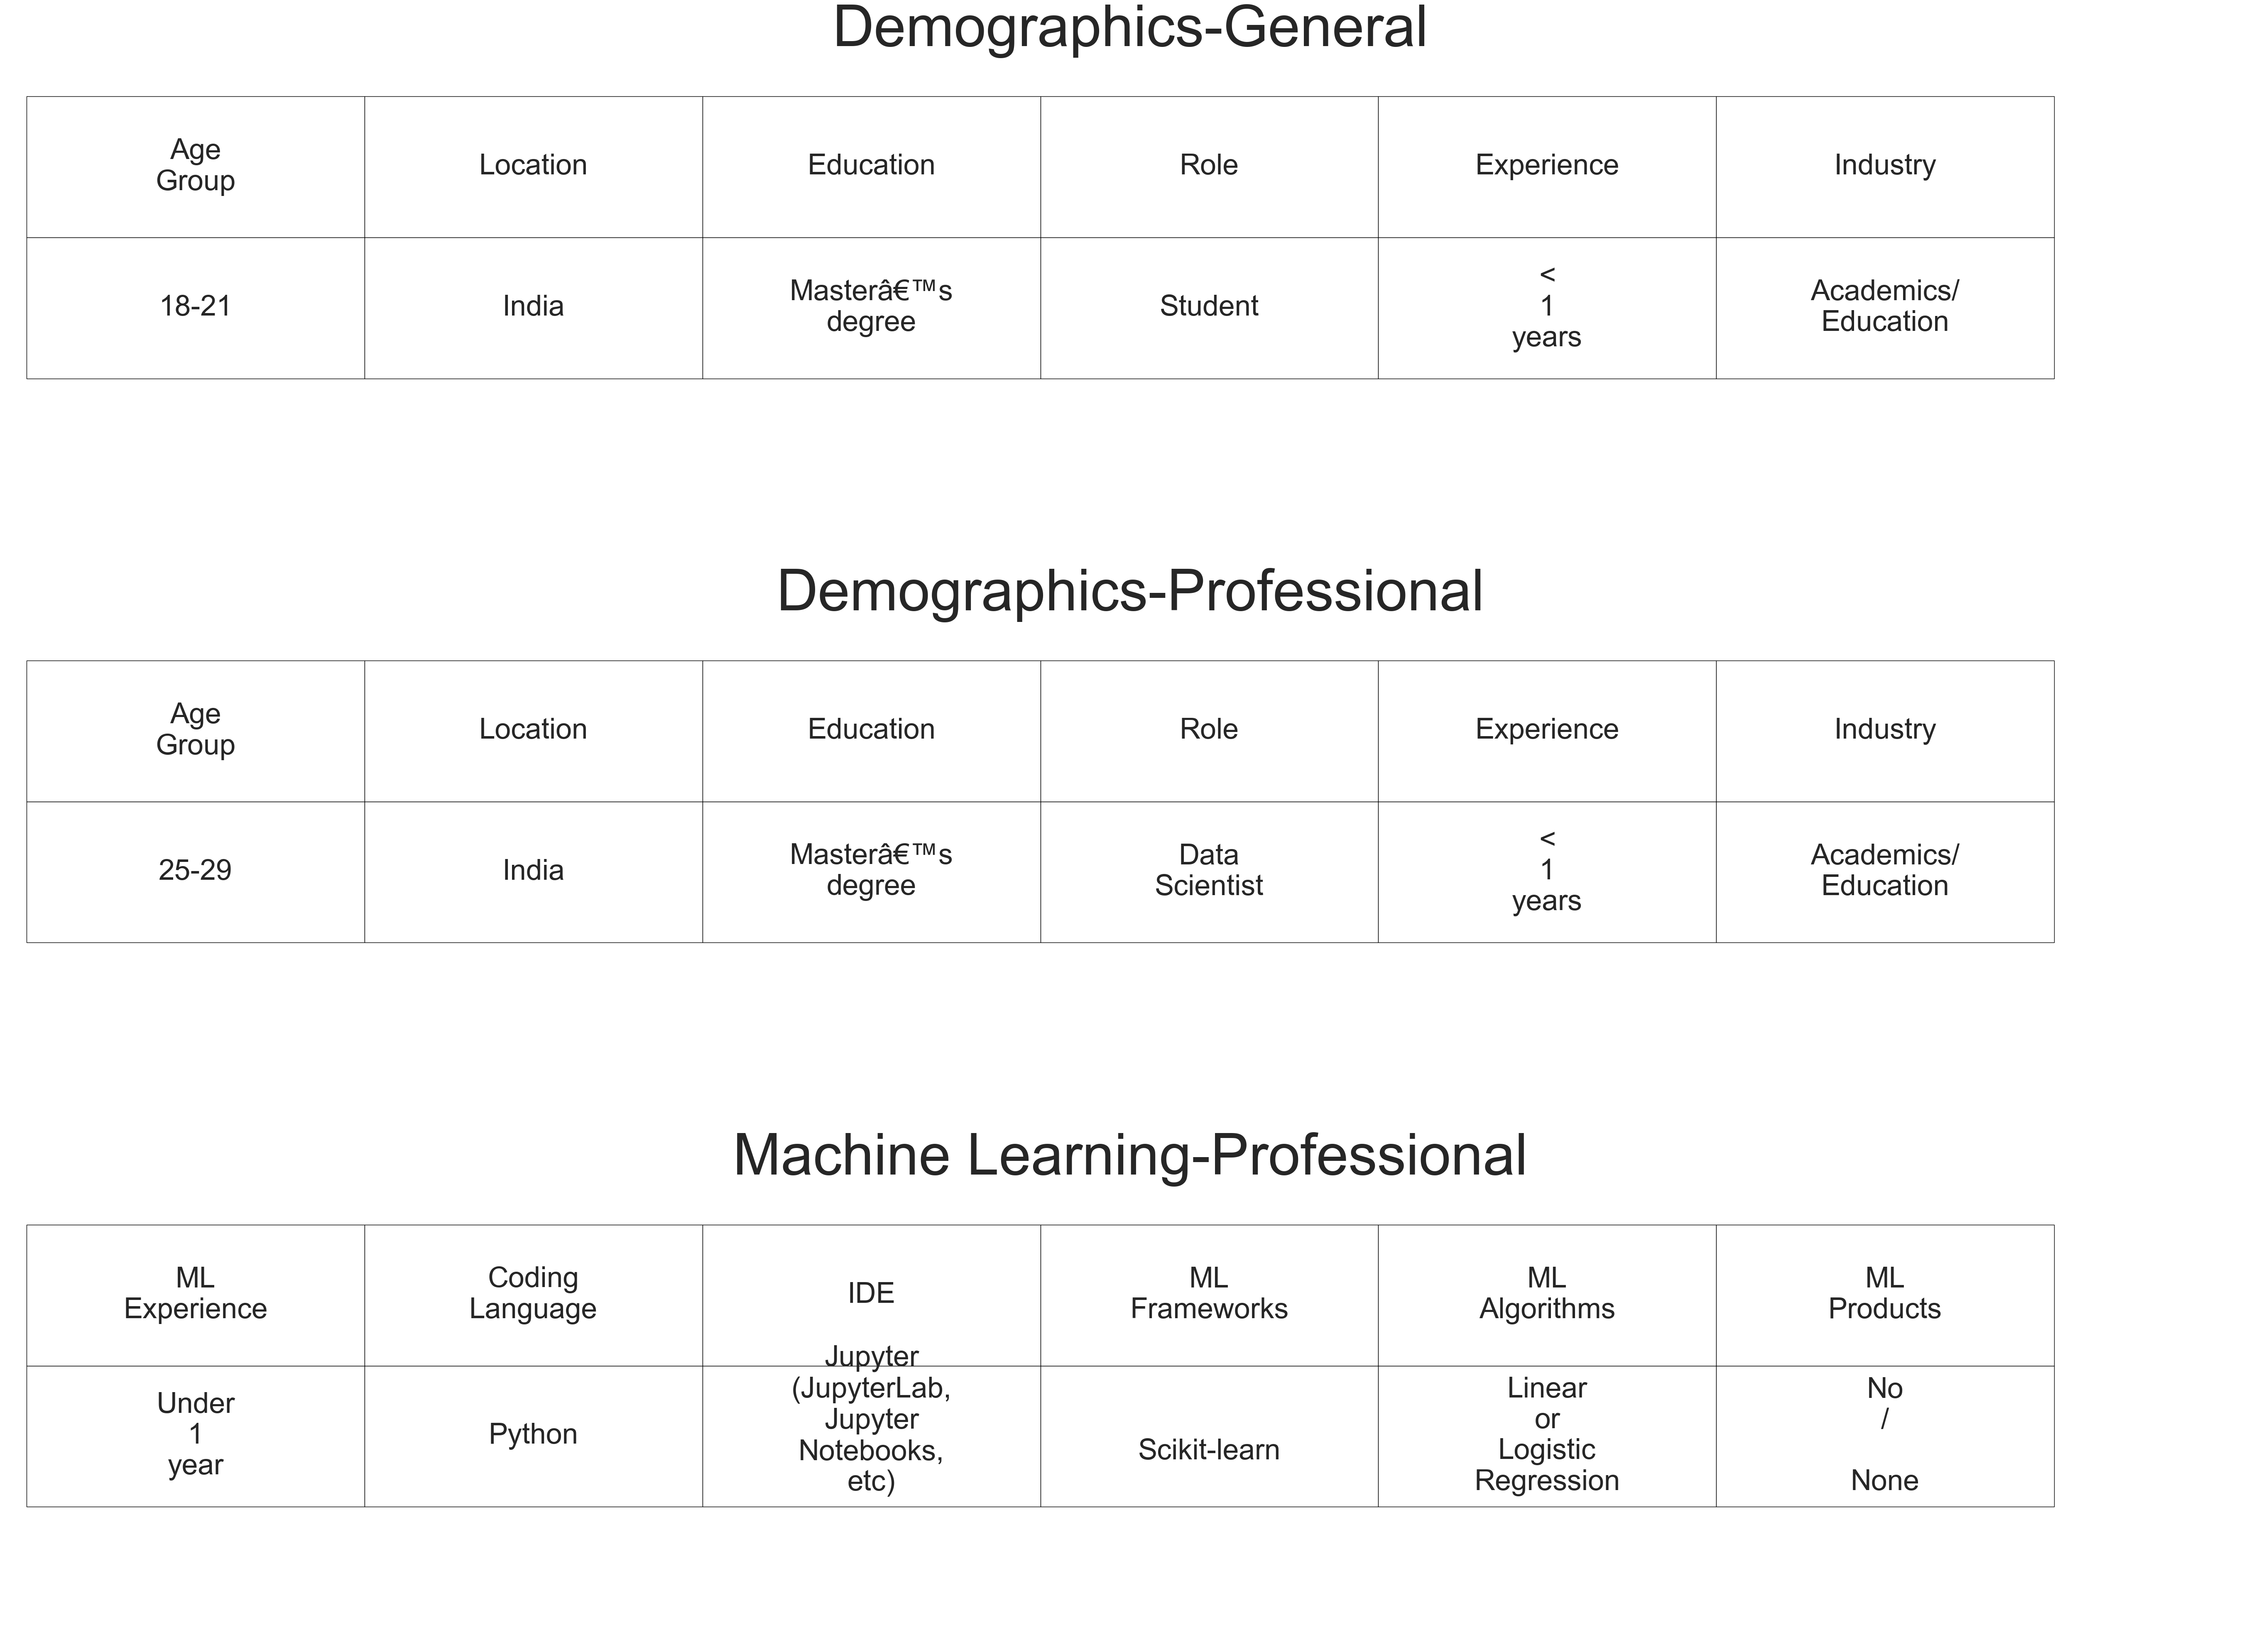

In [7]:
fig,ax = plt.subplots(3)
fig.set_size_inches(70,50)
basic_demographics = basic_stats[['Age Group','Location','Education','Role','Experience','Industry']]
table =  ax[0].table(cellText=[basic_demographics.apply(lambda x: x.replace(' ','\n').replace('/','/\n'))],\
                  colLabels = [x.replace(' ','\n').replace('-','-\n') for x in basic_demographics.index],\
                      colLoc='center',cellLoc='center',\
                      loc='center',bbox=(0.01,0.3,0.9,0.6))
table.auto_set_font_size(False)
table.set_fontsize(50)
ax[0].axis('off')
ax[0].axis('tight')
ax[0].set_title('Demographics-General',fontdict={'fontsize':100})

table =  ax[1].table(cellText=[prof_demog.apply(lambda x: x.replace(' ','\n').replace('/','/\n'))],\
                  colLabels = [x.replace(' ','\n').replace('-','-\n') for x in prof_demog.index],\
                      colLoc='center',cellLoc='center',\
                      loc='center',bbox=(0.01,0.3,0.9,0.6))
table.auto_set_font_size(False)
table.set_fontsize(50)
ax[1].axis('off')
ax[1].axis('tight')
ax[1].set_title('Demographics-Professional',fontdict={'fontsize':100})

table =  ax[2].table(cellText=[prof_ml_stats.apply(lambda x: x.replace(' ','\n').replace('/','/\n'))],\
                  colLabels = [x.replace(' ','\n').replace('-','-\n') for x in prof_ml_stats.index],\
                      colLoc='center',cellLoc='center',\
                      loc='center',bbox=(0.01,0.3,0.9,0.6))
table.auto_set_font_size(False)
table.set_fontsize(50)
ax[2].axis('off')
ax[2].axis('tight')
ax[2].set_title('Machine Learning-Professional',fontdict={'fontsize':100})
plt.show()

From the above tiles we can see that

- Most of the women population are Students and most of them are from India. Interestingly, the professional community is dominated by Data Scientists.
- Obviously then the Most Active Age Group stands out to be 18-21 Years and the age group as expected shifts towards 25-29 Years in the professional community.
- Interestingly, most of them either have Master's Degree or are pursuing it. Women are putting lot of effort in educating themselves !!
- Most of them are from Academia and have 1-3 Years of coding experience. Well that is understandable as the Data Science field/community is pretty young overall.
- The choice of Coding Language is Python with Scikit-learn


Upon examining the demographics of the small subset of professionals who are employed as Data/Reserach scientist we find that for this niche group...

- Although India and USA still account for more than 50% of the population, we can see that the 3rd largest contributor to the Data scientist position is United Kingdom of Great Britain and Northern Ireland.
- We can also see that women from other countries like France,Brazil and Germany are contributing significantly too.
- Almost 50% of the population has 3 or more years of experience. This is different from the earlier findings where 20s is the golden age. I guess experience is much more important in this field which is co-related to your age which is why more than 50% of the population is older than 30.

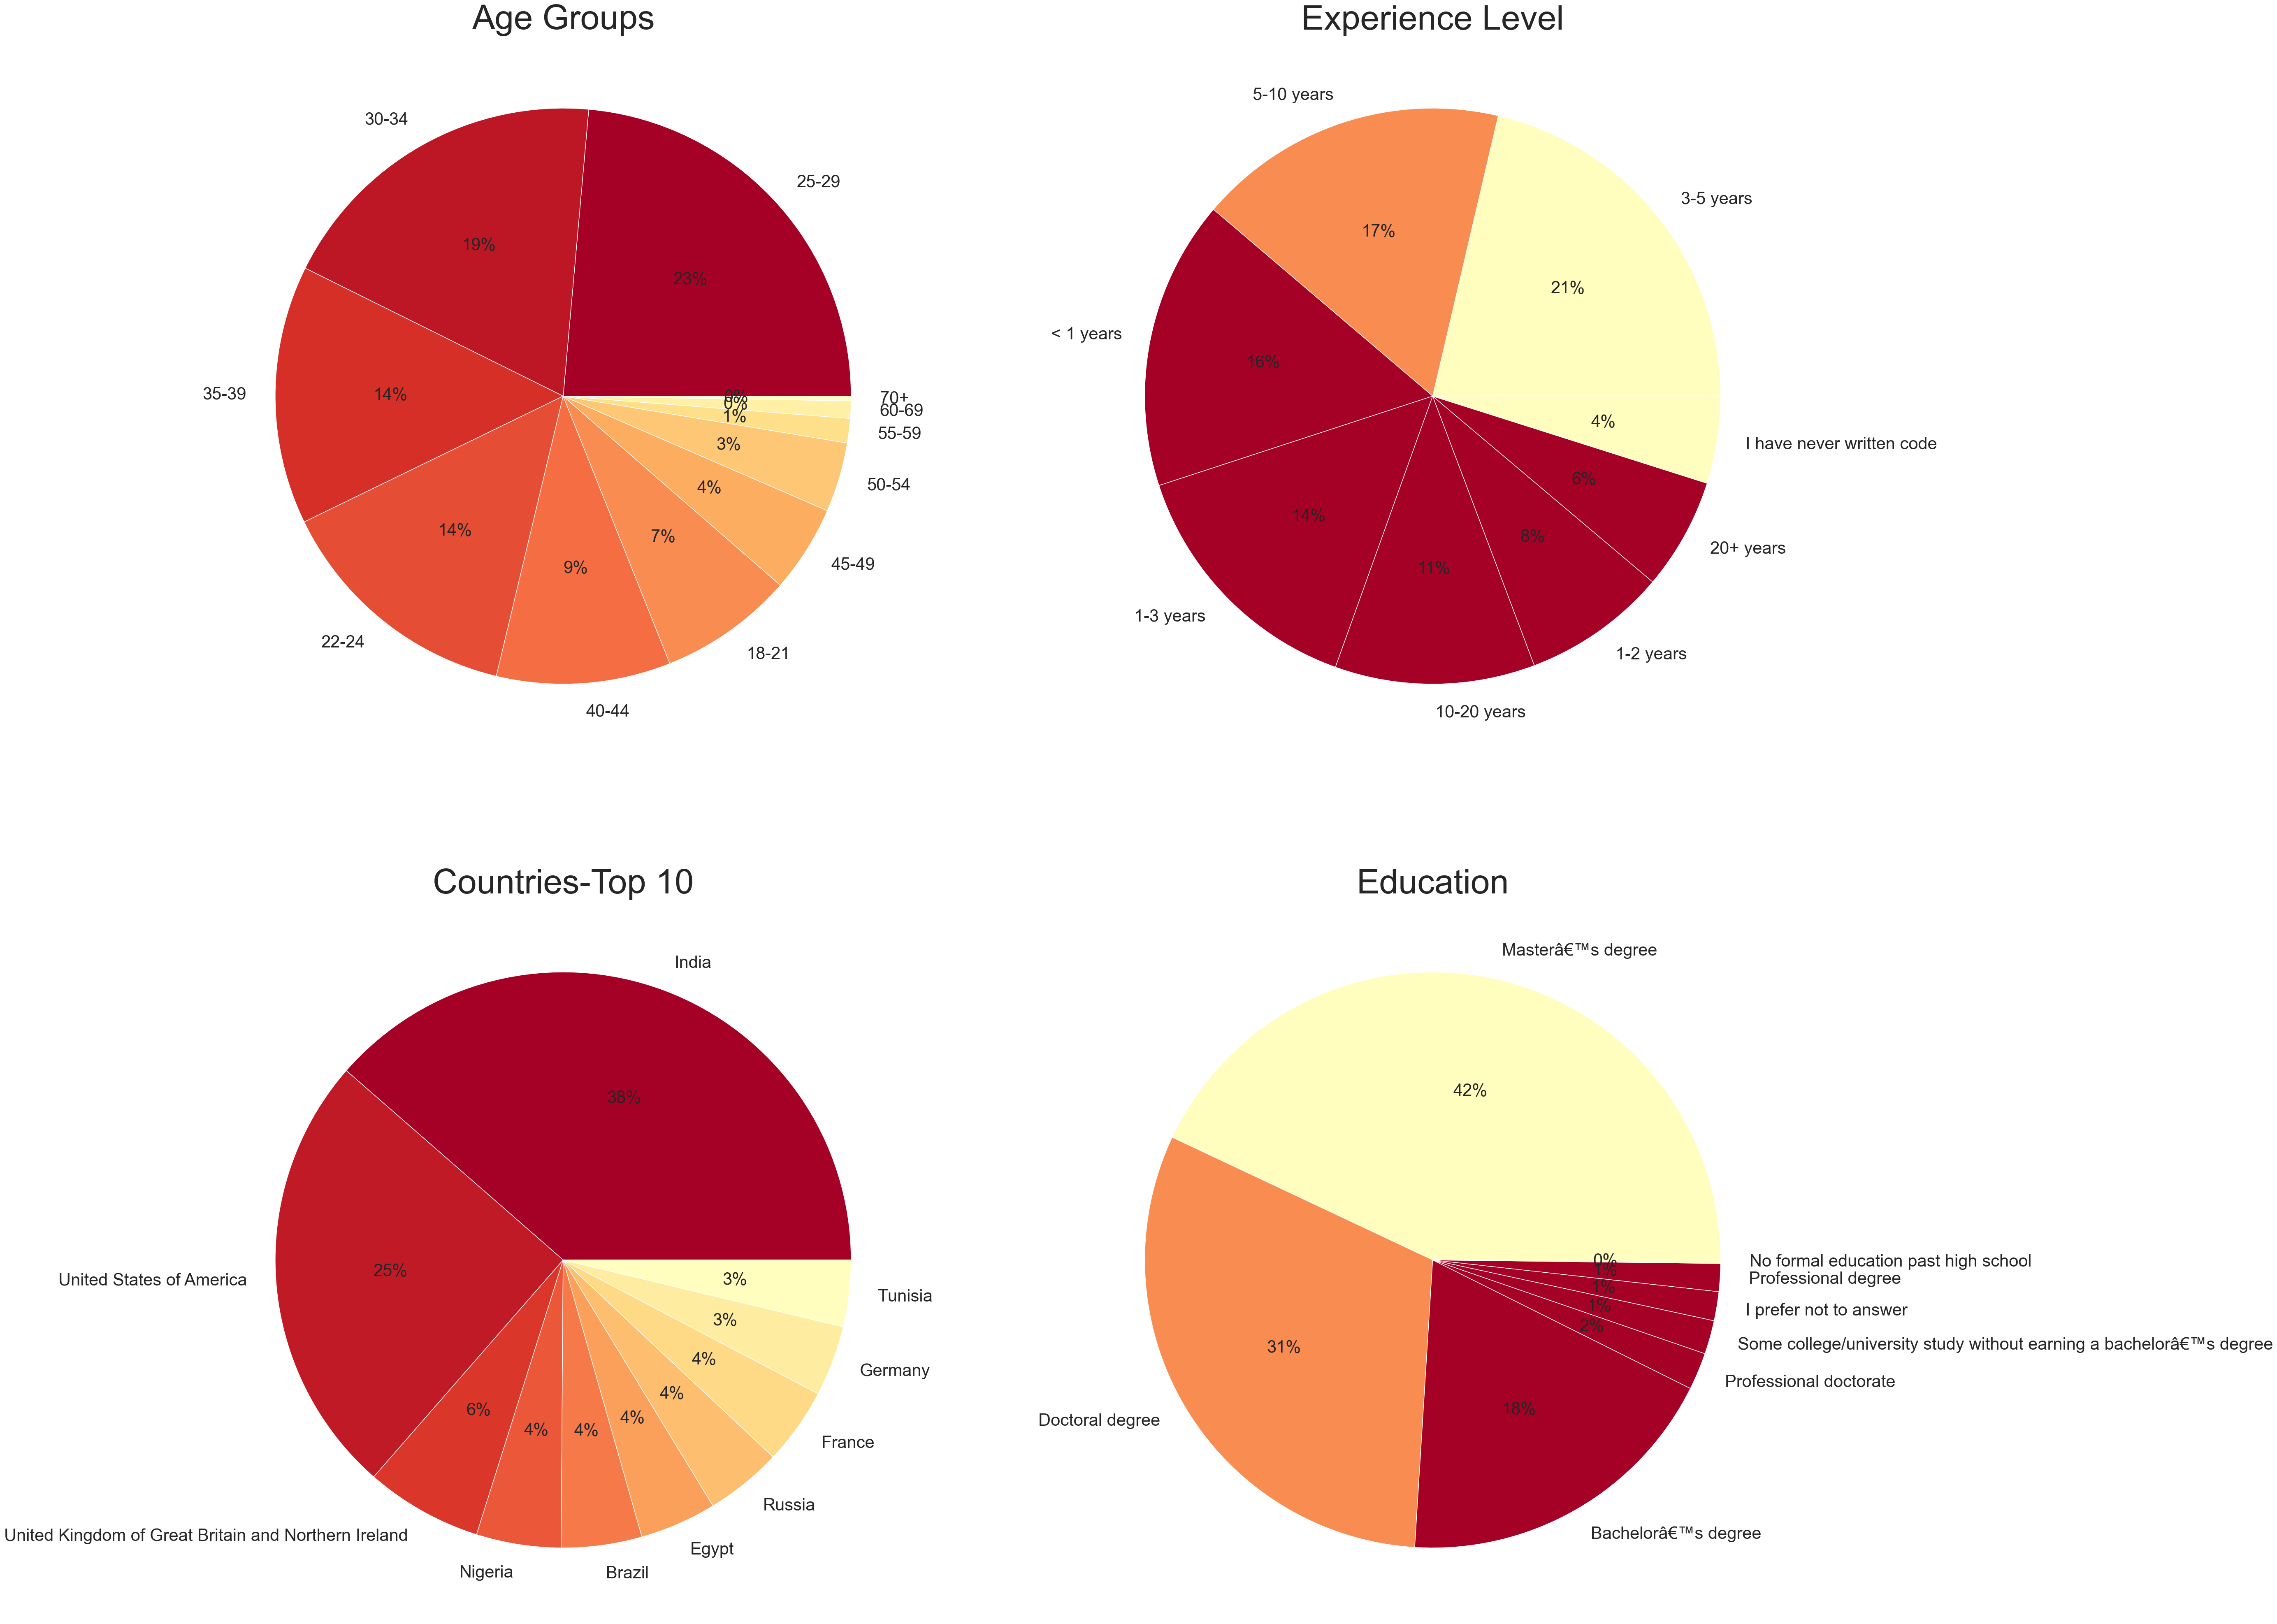

In [8]:
ds_rs_w_df = women_df[(women_df.Q5 == 'Data Scientist') | (women_df.Q5 == 'Research Scientist')]
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
fig.set_size_inches(50,50)
#age groups
ax1.pie(ds_rs_w_df['Q1'].value_counts(),labels =ds_rs_w_df['Q1'].value_counts().index,\
        autopct='%d%%',colors=plt.cm.RdYlGn_r(np.linspace(1, 0.5, 11)),textprops={'fontsize': 30})
ax1.set_title('Age Groups',fontsize=60)
'''#Role
ax2.pie(ds_rs_w_df['Q5'].value_counts(),labels=ds_rs_w_df['Q5'].value_counts().index,rotatelabels=True,\
        autopct='%d%%',colors=plt.cm.RdYlGn_r(np.linspace(1, 0.5, 15)),textprops={'fontsize': 25})

ax2.set_title('Roles',fontsize=20)'''

#countries
cdf = ds_rs_w_df[ds_rs_w_df.Q3 != 'Other']['Q3'].value_counts().sort_values(ascending=False).reset_index()
ax3.pie(cdf.iloc[0:10]['Q3'],labels=cdf.iloc[0:10]['index'],autopct='%d%%',\
        colors=plt.cm.RdYlGn_r(np.linspace(1, 0.5, 10)),textprops={'fontsize': 30})
ax3.set_title('Countries-Top 10',fontsize=60)

#education levels
ax4.pie(ds_rs_w_df['Q4'].value_counts(),labels=ds_rs_w_df['Q4'].value_counts().index,\
        colors=plt.cm.RdYlGn_r(np.linspace(0.5, 2, 7)),autopct='%d%%',textprops={'fontsize': 30})

ax4.set_title('Education',fontsize=60)

#Experience level
ax2.pie(ds_rs_w_df['Q6'].value_counts(),labels=ds_rs_w_df['Q6'].value_counts().index,\
        colors=plt.cm.RdYlGn_r(np.linspace(0.5, 2, 7)),autopct='%d%%',textprops={'fontsize': 30})

ax2.set_title('Experience Level',fontsize=60)
#ax6.set_axis_off()
plt.show()

There are some interesting findings when we compare the Women against the Male population

- While United States and India are the major contributors in terms of country-wise numbers the countries that stand out are Taiwan and Indonesia where the female population is much more actively involved than their male counterparts.
- In terms of Experience Level, female population is quite young with 27% being less than a year and almost 6% has never written code.
- The difference in population numbers increases even more at higher experience levels which indicates that Women joined the party pretty Late

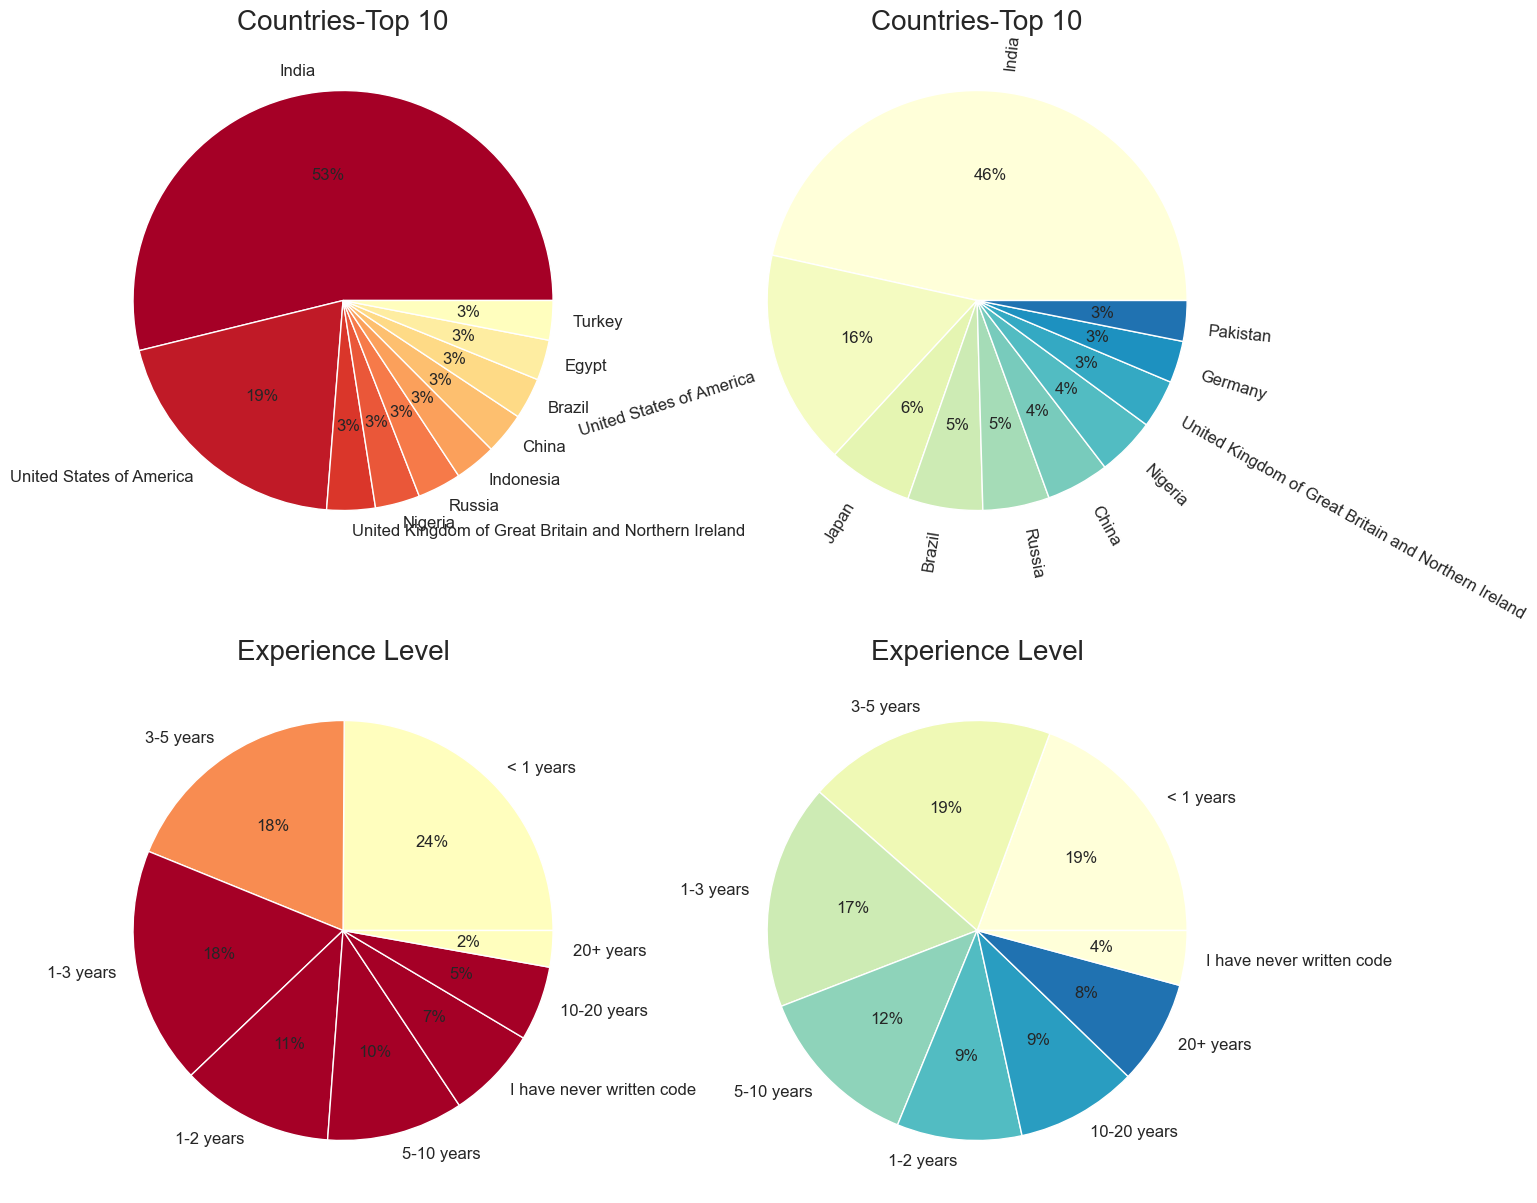

In [9]:
men_df = df.drop(0,axis=0)[df.Q2 == 'Man']
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
fig.set_size_inches(15,15)
#countries
cdf = women_df[women_df.Q3 != 'Other']['Q3'].value_counts().sort_values(ascending=False).reset_index()
ax1.pie(cdf.iloc[0:10]['Q3'],labels=cdf.iloc[0:10]['index'],autopct='%d%%',\
        colors=plt.cm.RdYlGn_r(np.linspace(1, 0.5, 10)),textprops={'fontsize': 12})
ax1.set_title('Countries-Top 10',fontsize=20)

#countries
cdf = men_df[men_df.Q3 != 'Other']['Q3'].value_counts().sort_values(ascending=False).reset_index()
ax2.pie(cdf.iloc[0:10]['Q3'],labels=cdf.iloc[0:10]['index'],autopct='%d%%',\
        colors=plt.cm.YlGnBu(np.linspace(0,0.7, 10)),textprops={'fontsize': 12},rotatelabels=True)
ax2.set_title('Countries-Top 10',fontsize=20)

#Experience level
ax3.pie(women_df['Q6'].value_counts(),labels=women_df['Q6'].value_counts().index,\
        colors=plt.cm.RdYlGn_r(np.linspace(0.5, 2, 7)),autopct='%d%%',textprops={'fontsize': 12})
ax3.set_title('Experience Level',fontsize=20)
#Experience level
ax4.pie(men_df['Q6'].value_counts(),labels=men_df['Q6'].value_counts().index,\
        colors=plt.cm.YlGnBu(np.linspace(0,0.7, 7)),autopct='%d%%',textprops={'fontsize': 12})

ax4.set_title('Experience Level',fontsize=20)
plt.show()

This next visualization deals with number of Data/reasearch Scientists across various industries and company sizes. The table on the right shows the most frequent value in each category

- As expected, Academia employs most number of Data scientists but they work in small groups and may be doing more focused research.
- We can also see that most of the industries have very small sizes despite the relatively large market of the industry itself. This may be attributed to the fact that industries frequently outsource Machine Learning work to small startups who specialize in such kind of work instead of investing in it from scratch.
- This is probably why we see that Computers/technology industry, inspite of being gigantic in size, has most of companies with a relatively small size. This could further be validated if we have the data on the startup numbers and growth data for the start-ups in ML space.
- The only excpetions to 2 are Accounting/Finance, Government/Public Service, Shipping, Manufacturing, etc. Could this be due to the data sensitivity and relatively closed industry idealogy?

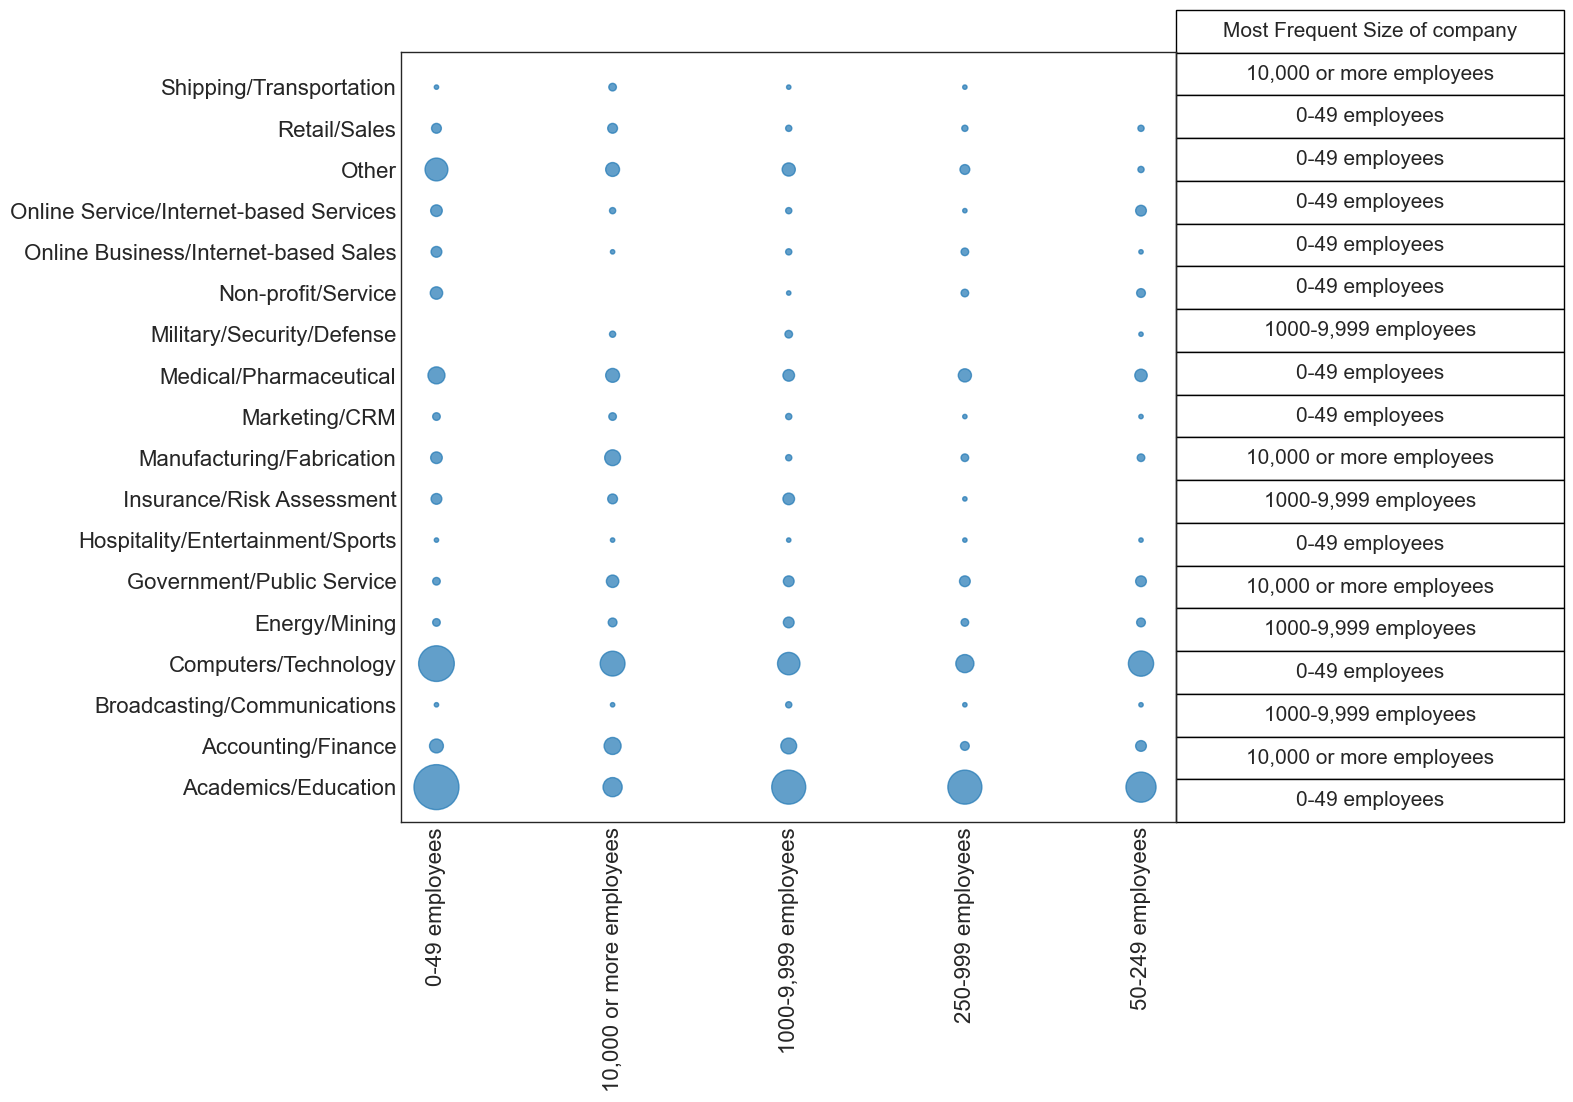

In [10]:
import itertools
industry_series = w_prof_df['Q20'].value_counts()
cmp_size_series = w_prof_df.groupby('Q20')['Q21'].value_counts()

ind_size_ct = pd.crosstab(ds_rs_w_df['Q20'],ds_rs_w_df['Q21']).stack().reset_index(name='value')
#fig,ax = plt.subplots()
fig,ax = plt.subplots()
fig.set_size_inches(10,10)
#ax = ct_top10_ocp.plot.scatter('Q5','Q3',s=ct_top10_ocp.value/2,color=plt.cm.Blues_r(np.linspace(0,0.9,150)))
c=[np.linspace(i,0.5,5) for i in range(len(list(w_prof_df['Q21'].unique())))]
#colors = list(itertools.chain.from_iterable(c))
'''colors={'India':'#8dd3c7', 'Pakistan':'#ffffb3', 'Russia':'#bebada', \
        'Nigeria':'#fb8072', 'Japan':'#80b1d3', 'Egypt':'#fdb462',
       'Brazil':'#b3de69', 'China':'#fccde5', 'United States of America':'#d9d9d9',
       'United Kingdom of Great Britain and Northern Ireland':'#bc80bd'}'''
ax.scatter(ind_size_ct['Q21'],ind_size_ct['Q20'],s=ind_size_ct.value*10,alpha=0.7)#,color=ind_size_ct['Q21'].map(colors))
ax.tick_params(axis='x',labelrotation=90)
data = [[x] for x in list(pd.crosstab(ds_rs_w_df['Q20'],ds_rs_w_df['Q21']).idxmax(axis=1))]
data.reverse()
table = ax.table(cellText=data,\
                      colLabels=['Most Frequent Size of company'],\
                      fontsize=24,colLoc='center',cellLoc='center',\
                      loc='right',colWidths=[0.1],\
                        bbox=(1,0,0.5,1.055))
table.auto_set_font_size(False)
table.set_fontsize(15)
table.auto_set_column_width('Most Frequent Size of company')
#table.scale(1,1.5)
plt.show()

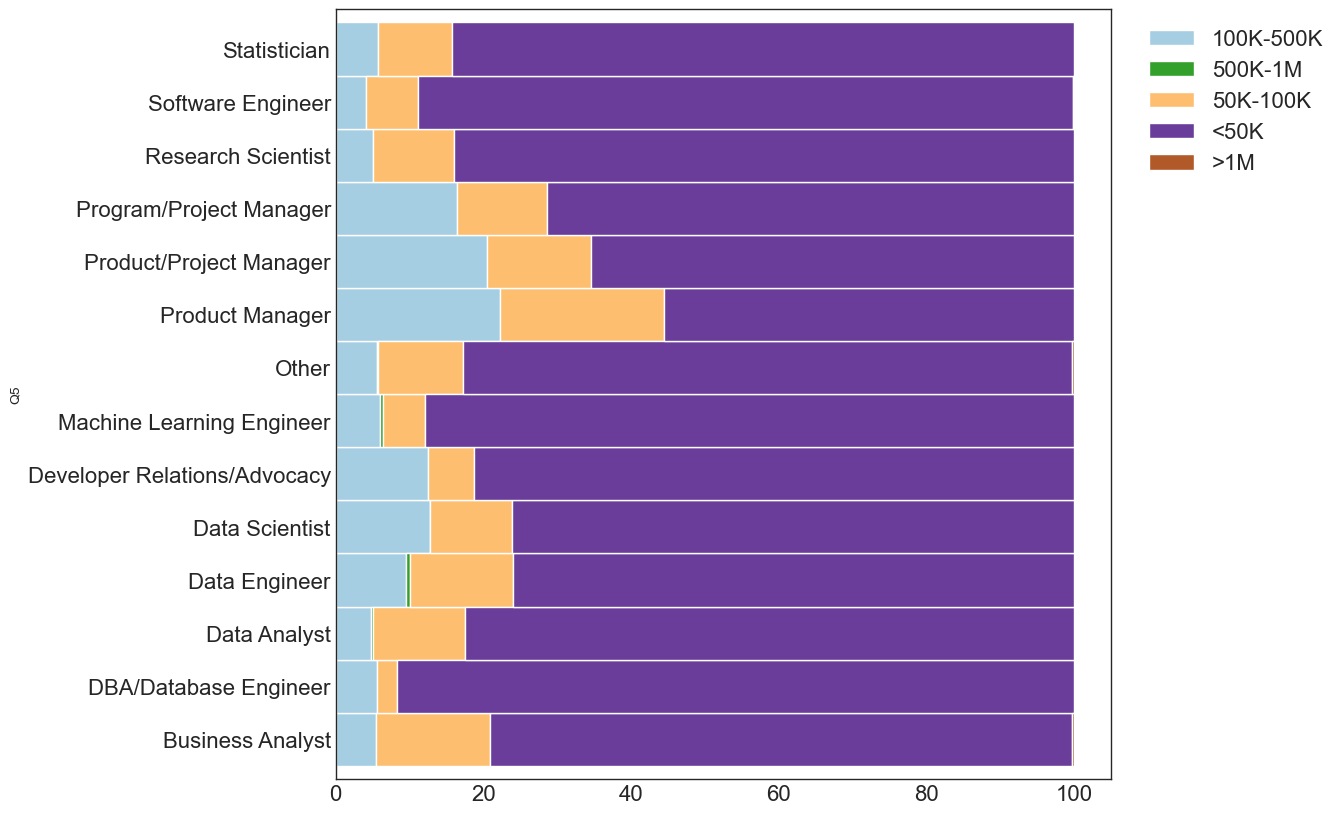

In [11]:
def get_sal_bin(sal_range):
    #import pdb;pdb.set_trace()
    try:
        upper_range = int(sal_range.split('-')[1].replace(',','')) 
    except:
        upper_range = 1000000 if sal_range == '>$1,000,000' else 0
    if upper_range < 50000:
        return '<50K'
    elif 50000<=upper_range<100000:
        return '50K-100K'
    elif 100000<=upper_range<500000:
        return '100K-500K'
    elif 500000<=upper_range<1000000:
        return '500K-1M'
    elif upper_range >= 1000000:
        return '>1M'

ct_role_sal = pd.crosstab(w_prof_df.Q5,w_prof_df['Q25'].apply(lambda x: get_sal_bin(x)))#.stack().reset_index(name='value')
#w_prof_df['Q25'].unique()
ax = ct_role_sal.apply(lambda r: r/r.sum()*100, axis =1)\
.plot(kind='barh',colormap =plt.get_cmap("Paired"),figsize=(10,10),width=1,stacked=True)
plt.legend(loc='upper right',bbox_to_anchor=(0.8, 0.5, 0.5, 0.5))
plt.show()

Quite oddly.... Women seem to be greatly underpaid where the salaries are less than 50K per annum across all the roles. Part of this can be explained by the next visualization where we analyze the salaries by the Top 10 (by population) country and you can see that India where the majority of population resides has really low salaries. So that's bringing down the average across all the roles.

United States as one would expect is the destination in terms of salaries but Europe presents a different picture. Although United Kingdom is the 3rd largest contributor to the Women Professionals, Germany seems to be the destination in terms of attractive salaries.

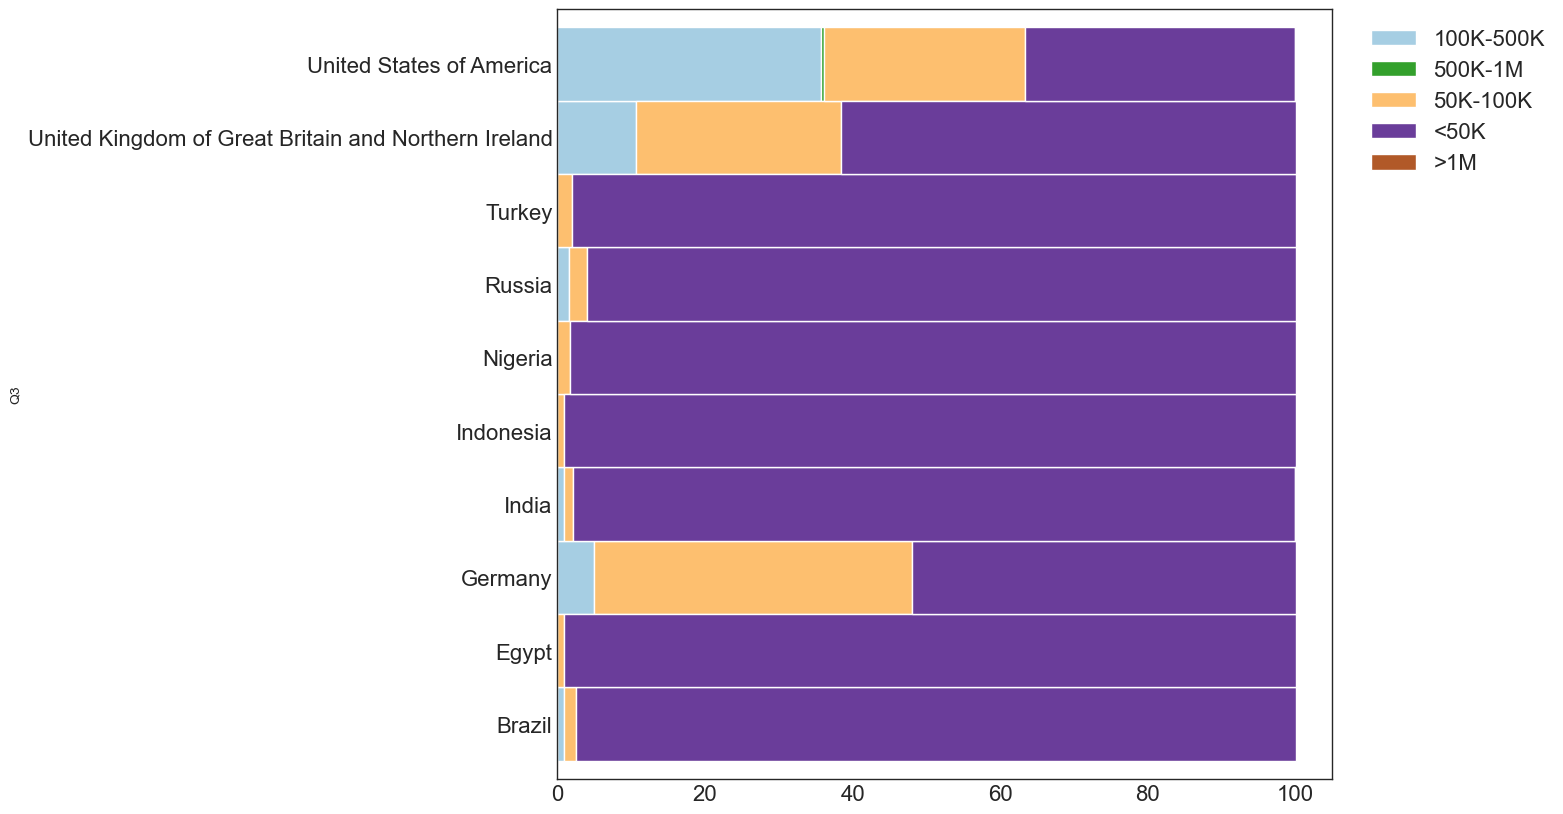

In [12]:

cdf = w_prof_df[w_prof_df.Q3 != 'Other']['Q3'].value_counts().sort_values(ascending=False).reset_index()
ct_role_sal = pd.crosstab(w_prof_df[w_prof_df.Q3.isin(cdf[0:10]['index'])].Q3,w_prof_df[w_prof_df.Q3.isin(cdf[0:10]['index'])]['Q25'].apply(lambda x: get_sal_bin(x)))#.stack().reset_index(name='value')
#w_prof_df['Q25'].unique()
ax = ct_role_sal.apply(lambda r: r/r.sum()*100, axis =1)\
.plot(kind='barh',colormap =plt.get_cmap("Paired"),figsize=(10,10),width=1,stacked=True)
plt.legend(loc='upper right',bbox_to_anchor=(0.8, 0.5, 0.5, 0.5))
plt.show()

Next we will try to analyze the Machine Learning algorithms, tools and cloud data for women and compare it with rest of the population. First up is a cross-tabulation of algorithms used across roles that these Women work in. As expected you would see that

- Most used algorithms are Linear/Logistic Regression, Decision Trees/Random Forest and GBM.
- Evolutionary algorithms are explored mostly by Research scientists; consistent with rest of the population.
- The areas where women seem to have taken different approach is that lot of females employed as Developer Relations/Advocacy seem to favor GAN & Transformer Networks and lot of Women Research Scientists are exploring Bayesian Techniques which seems to be a favorite of Statisticians otherwise.

In [15]:
import palettable.scientific.sequential as palette
from palettable.tableau import Tableau_20
from matplotlib.ticker import FuncFormatter

def visualize_relation(start_slice, end_slice, new_col_names, old_col, new_col, xlabel, title, p1,p2,df,display_type):
    #import pdb; pdb.set_trace()
    df_sliced = df.loc[:,start_slice:end_slice]

    df_sliced = df_sliced.rename(columns=new_col_names).fillna(0).replace('[^\\d]',1, regex=True)
    df_sliced = df_sliced.join(df[old_col])

    df_sliced_stats = pd.DataFrame()
    for col in df_sliced.columns[:-1]:
        df_sliced_stats[col] = df_sliced.groupby(old_col)[col].mean().values

    df_sliced = df_sliced.rename(columns={old_col:new_col})
    df_sliced_stats.index = df_sliced.groupby(new_col)[list(new_col_names.items())[0][1]].mean().index

    cmap = sns.diverging_palette(p1, p2, as_cmap=True)
    if display_type == 1:
        display(df_sliced_stats.style.background_gradient(cmap, axis=0).format("{:.0%}"))
    else:
        df_sliced_stats[new_col] = df_sliced_stats.index
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111)
        for i in range(len(df_sliced_stats.columns[:-1])):
            color = Tableau_20.hex_colors[i]
            col = df_sliced_stats.columns[i]
            df_sliced_stats.plot(kind="scatter", x=col,y=new_col, color=color, label=col,ax=ax, s=100)

        ax.xaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
        ax.set_xlabel(xlabel)
        ax.legend(loc='upper right',bbox_to_anchor=(1.5, 1), frameon=False)
        ax.set_title(title)
        plt.show()

In [14]:
pip install palettable

Note: you may need to restart the kernel to use updated packages.Collecting palettable
     -------------------------------------- 332.3/332.3 kB 1.3 MB/s eta 0:00:00



In [16]:
new_col_names ={'Q17_Part_1': 'Lin/Log Reg',
                'Q17_Part_2': 'Dec Trees/Random For',
                'Q17_Part_3': 'GBM',
                'Q17_Part_4': 'Bayesian Approaches',
                'Q17_Part_5': 'Evolutionary Approaches',
                'Q17_Part_6': 'Dense NN',
                'Q17_Part_7': 'CNN',
                'Q17_Part_8': 'GAN',
                'Q17_Part_9': 'RNN',
                'Q17_Part_10': 'Transformer Networks',
                'Q17_Part_11': 'None',
                'Q17_OTHER': 'Other'
                }

visualize_relation('Q17_Part_1','Q17_OTHER', new_col_names, 'Q5', 'Role-Female', "Usage of Models", "Role vs Model Used", 240, 10,w_prof_df,1)
prof_df_all = df.drop(0,axis=0)[(df.Q2 != 'Woman') & (df.Q5 !='Student') & (df.Q5 != 'Currently not employed')]
visualize_relation('Q17_Part_1','Q17_OTHER', new_col_names, 'Q5', 'Role-Male', "Usage of Models", "Role vs Model Used", 240, 10,prof_df_all,1)

,Lin/Log Reg,Dec Trees/Random For,GBM,Bayesian Approaches,Evolutionary Approaches,Dense NN,CNN,GAN,RNN,Transformer Networks,None,Other
Role-Female,,,,,,,,,,,,
Business Analyst,39%,32%,16%,14%,1%,5%,9%,2%,6%,3%,7%,2%
DBA/Database Engineer,44%,39%,11%,6%,0%,6%,3%,3%,3%,6%,3%,3%
Data Analyst,50%,43%,19%,16%,2%,7%,12%,2%,8%,4%,6%,2%
Data Engineer,57%,45%,27%,16%,1%,9%,20%,3%,15%,8%,11%,3%
Data Scientist,71%,67%,45%,25%,4%,15%,29%,4%,20%,11%,3%,3%
Developer Relations/Advocacy,31%,31%,19%,12%,6%,12%,19%,12%,12%,12%,6%,0%
Machine Learning Engineer,57%,50%,32%,20%,6%,24%,47%,9%,29%,13%,3%,2%
Other,38%,32%,13%,12%,2%,6%,15%,2%,7%,2%,6%,2%
Product Manager,38%,36%,16%,13%,4%,4%,9%,2%,4%,11%,4%,0%


,Lin/Log Reg,Dec Trees/Random For,GBM,Bayesian Approaches,Evolutionary Approaches,Dense NN,CNN,GAN,RNN,Transformer Networks,None,Other
Role-Male,,,,,,,,,,,,
Business Analyst,29%,24%,14%,10%,1%,5%,8%,1%,6%,2%,4%,1%
Chief Officer,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
Computer Scientist,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
Consultant,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
DBA/Database Engineer,27%,21%,12%,8%,2%,5%,9%,2%,7%,2%,5%,1%
Data Analyst,33%,27%,15%,10%,2%,6%,9%,2%,6%,2%,4%,1%
Data Engineer,38%,33%,21%,14%,3%,11%,20%,4%,14%,5%,5%,1%
Data Journalist,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
Data Miner,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%


In [17]:
list(w_stats_df.columns)

['-',
 'Time from Start to Finish (seconds)',
 'Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q6',
 'Q7_Part_1',
 'Q7_Part_2',
 'Q7_Part_3',
 'Q7_Part_4',
 'Q7_Part_5',
 'Q7_Part_6',
 'Q7_Part_7',
 'Q7_Part_8',
 'Q7_Part_9',
 'Q7_Part_10',
 'Q7_Part_11',
 'Q7_Part_12',
 'Q7_OTHER',
 'Q8',
 'Q9_Part_1',
 'Q9_Part_2',
 'Q9_Part_3',
 'Q9_Part_5',
 'Q9_Part_6',
 'Q9_Part_7',
 'Q9_Part_8',
 'Q9_Part_9',
 'Q9_Part_10',
 'Q9_Part_12',
 'Q9_OTHER',
 'Q10_Part_1',
 'Q10_Part_2',
 'Q10_Part_3',
 'Q10_Part_4',
 'Q10_Part_5',
 'Q10_Part_6',
 'Q10_Part_7',
 'Q10_Part_8',
 'Q10_Part_9',
 'Q10_Part_10',
 'Q10_Part_11',
 'Q10_Part_12',
 'Q10_Part_16',
 'Q10_OTHER',
 'Q11',
 'Q12new',
 'Q12_Part_1',
 'Q12_Part_2',
 'Q12_Part_5',
 'Q12_OTHER',
 'Q13',
 'Q14_Part_1',
 'Q14_Part_2',
 'Q14_Part_3',
 'Q14_Part_4',
 'Q14_Part_5',
 'Q14_Part_6',
 'Q14_Part_7',
 'Q14_Part_8',
 'Q14_Part_9',
 'Q14_Part_10',
 'Q14_Part_11',
 'Q14_OTHER',
 'Q15',
 'Q16_Part_1',
 'Q16_Part_2',
 'Q16_Part_3',
 'Q16_Part_4',
 'Q16_Part_5',
 'Q

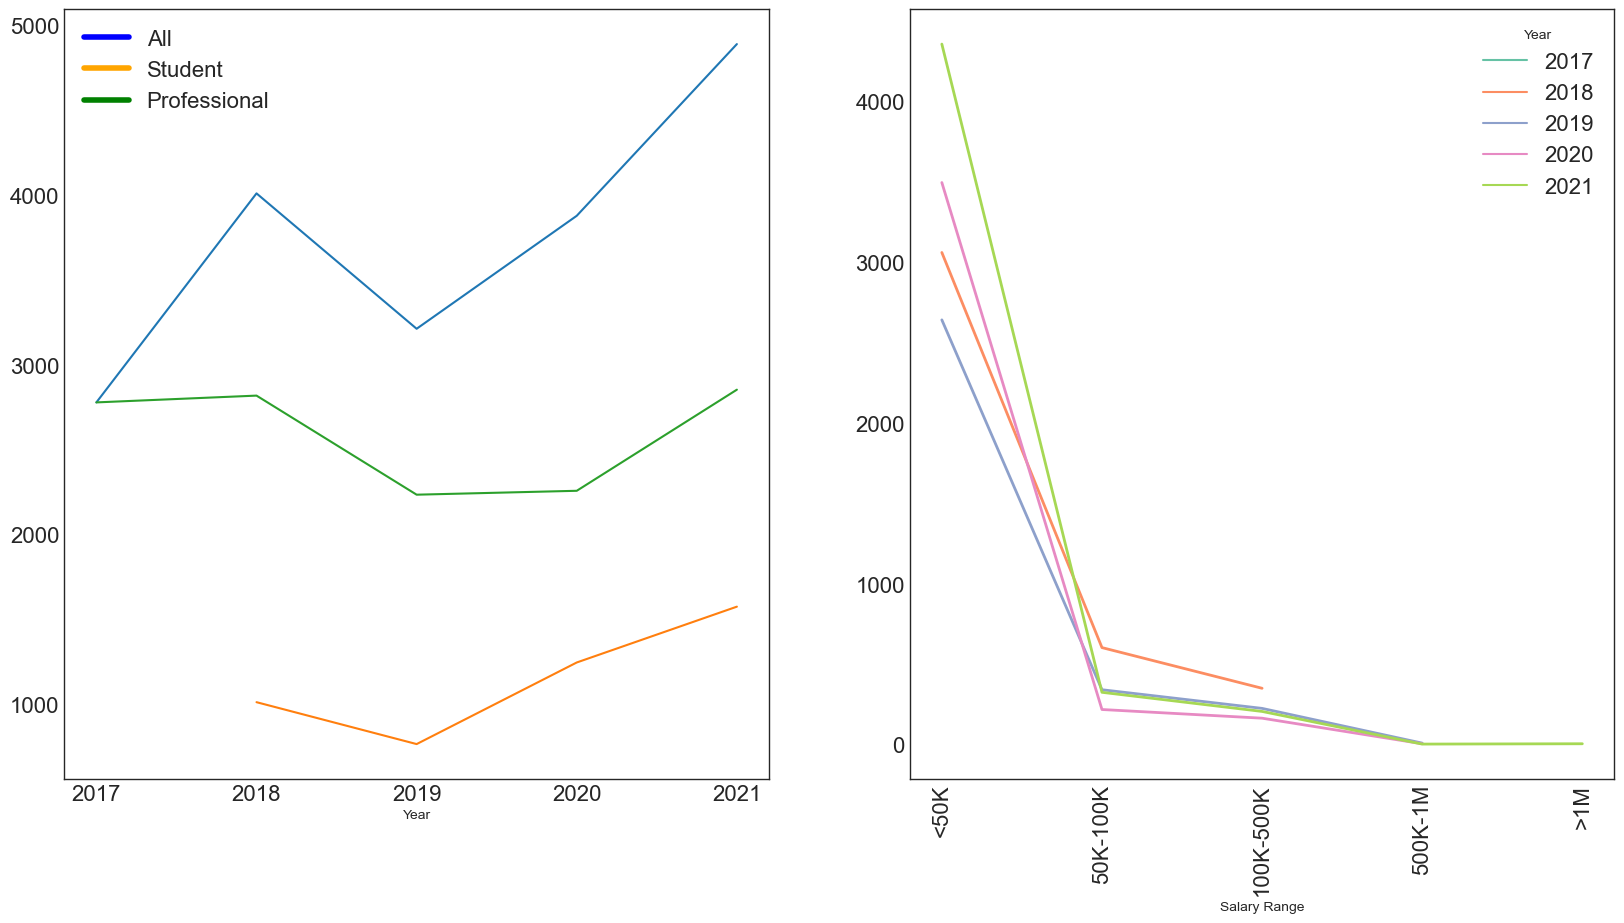

In [21]:
from matplotlib.ticker import MaxNLocator

fig,(ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(20,10)
combined_data[combined_data.Q2 == 'Woman'].groupby(['Year']).Q2.count().plot.line(ax=ax1)
combined_data[(combined_data.Q2 == 'Woman') & (combined_data.Q5 == 'Student')].groupby(['Year']).Q2.count().plot.line(ax=ax1)
combined_data[(combined_data.Q2 == 'Woman') & (combined_data.Q5 != 'Student') \
              & (combined_data.Q5 != 'Currently not employed') & (combined_data.Q5 != 'Not employed')].groupby(['Year']).Q2.count().plot.line(ax=ax1)
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='green', lw=4)]
ax1.legend(custom_lines, ['All', 'Student', 'Professional'])

sal_agg_year = pd.DataFrame(combined_data[combined_data.Q2 == 'Woman'].groupby(['Year'])['Q25'].value_counts()).rename(columns={'Q25':'Sal'}).reset_index()
sal_agg_year.drop(sal_agg_year[sal_agg_year.Q25 == 'I do not wish to disclose my approximate yearly compensation'].index,inplace=True)

ax2 = sns.lineplot(data=sal_agg_year,x='Q25',y='Sal',hue='Year',linewidth=2,sort=True,palette=['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854'])
ax2.tick_params(axis='x', rotation=90)
ax2.set(xlabel='Salary Range', ylabel='')
plt.show()

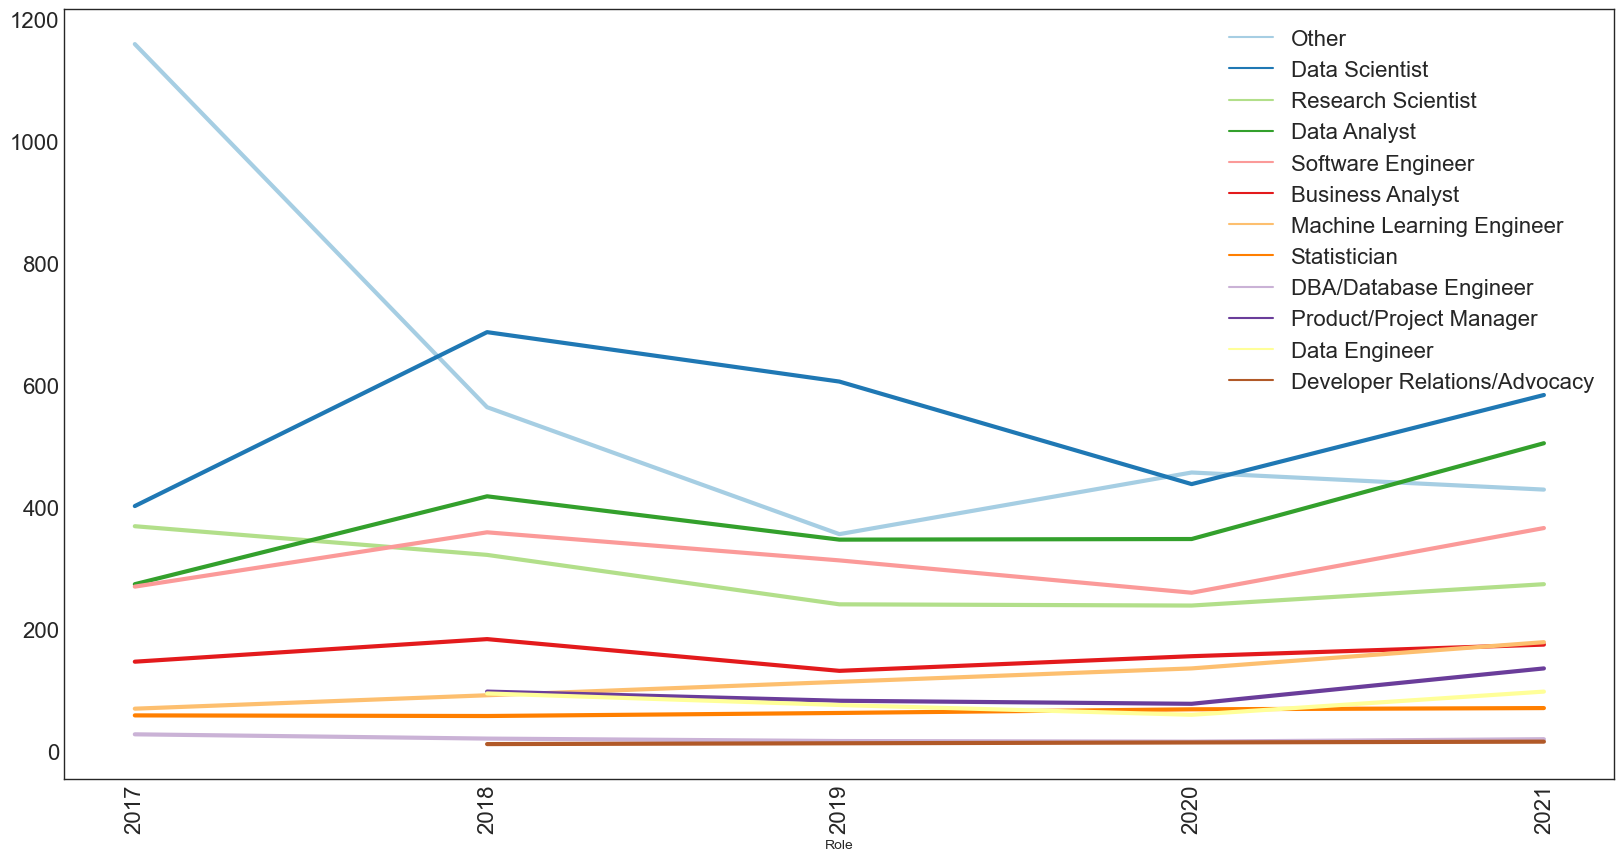

In [22]:
combined_data_prof_w= combined_data[(combined_data.Q2 == 'Woman') & (combined_data.Q5 != 'Student') \
              & (combined_data.Q5 != 'Currently not employed') & (combined_data.Q5 != 'Not employed')]
combined_data_prof_w['Q5'] = combined_data_prof_w['Q5'].fillna('Other')\
                    .replace('Product Manager','Product/Project Manager')\
                    .replace('Program/Project Manager','Product/Project Manager')\
                    .replace('Marketing Analyst','Business Analyst')\
                    .replace('Software Developer/Software Engineer','Software Engineer')\
                    .replace('Programmer','Software Engineer')\
                    .replace('Engineer','Software Engineer')\
                    .replace('Developer Advocate','Developer Relations/Advocacy')\
                    .replace('Scientist/Researcher','Research Scientist')\
                    .replace('Research Assistant','Research Scientist')\
                    .replace('Researcher','Research Scientist')\
                    .replace('Computer Scientist','Research Scientist')\
                    .replace('Operations Research Practitioner','Research Scientist')\
                    .replace('Data Miner','Data Scientist')\
                    .replace('Predictive Modeler','Data Scientist')\
                    .replace('Consultant','Other')\
                    .replace('Chief Officer','Other')\
                    .replace('Manager','Product/Project Manager')\
                    .replace('Salesperson','Other')\
                    .replace('Principal Investigator','Other')\
                    .replace('Data Journalist','Other')


fig,(ax1) = plt.subplots(1,1)
fig.set_size_inches(20,10)

role_trends = pd.DataFrame(combined_data_prof_w.groupby(['Year'])['Q5'].value_counts()).rename(columns={'Q5':'Count'}).reset_index()
ax1 = sns.lineplot(data=role_trends\
            ,x='Year',y='Count',hue='Q5',linewidth=3,sort=True,palette=['#a6cee3','#1f78b4',\
                                                                        '#b2df8a','#33a02c','#fb9a99',\
                                                                        '#e31a1c','#fdbf6f','#ff7f00',\
                                                                        '#cab2d6','#6a3d9a','#ffff99','#b15928'])
ax1.tick_params(axis='x', rotation=90)
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.set(xlabel='Role', ylabel='')
ax1.legend(loc='upper right')
plt.show()
#role_trends

We can notice few things regrading the general trends here:

- A lot of women took to studying, assuming in the related field post 2017. This really added to the workforce growth post 2020. However, the rate of growth for professionals is not same as students.
- 2019 saw major dips in terms of professionals and students. Can this be attributed to the pandemic? smilar trend is seen in salary growth too.
- Again the majority of women are earning under 50k per annum but post 2020 we have seen some groth in terms of salary. However, it still looks like the starting salary for women in this field stays below 50k.
- The last visualization points that women have been targeting roles like 'Data/Reserach Scientist', 'Data Analyst' and 'Software Engineer' much more than other roles as these roles are seeing much more growth than others.